# EXPLORATORY DATA ANALYSIS

In [4]:
!pip install pandas_profiling
!pip install sweetviz

ERROR: unknown command "insall" - maybe you meant "install"



In [15]:
!pip install keras
!pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\LENOVO\anaconda3\lib\http\client.py", line 461, in read
    n = self.readinto(b)
  File "C:\Users\LENOVO\anaconda3\lib\http\client.py", line 505, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\LENOVO\anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\LENOVO\anaconda3\lib\ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\LENOVO\anaconda3\lib\ssl.py", line 929, in read
    return self._sslobj.read(len, buff

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns
import sklearn as sl
from scipy import stats
import math
import os
# import keras     # 'Keras requires TensorFlow 2.2 or higher. '
# import tensorflow as tf
import pandas_profiling as pp
import sweetviz as sv

In [2]:
data1=pd.read_csv("D:\\DATA_science\\PYTHON_MATERIAL\\data_clean.csv")

In [3]:
data1.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
5,6,28.0,NaN,14.9,66,5,6,2010,66,C
6,7,23.0,299.0,8.6,65,5,7,2010,65,PS
7,8,19.0,99.0,13.8,59,5,8,2010,59,C
8,9,8.0,19.0,20.1,61,5,9,2010,61,PS
9,10,NaN,194.0,8.6,69,5,10,2010,69,S


In [4]:
type(data1)
data1.shape

(158, 10)

In [5]:
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

# Data Type Converson

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [7]:
data2=data1.iloc[:,1:]

In [8]:
data2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [9]:
data=data2.copy()

In [10]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')
data['Weather']=data['Weather'].astype('category')
data['Weather']

0       S
1       C
2      PS
3       S
4       S
       ..
153     C
154    PS
155     S
156     S
157     C
Name: Weather, Length: 158, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB



# Duplicates

In [12]:
data[data.duplicated()].shape

(1, 9)

In [13]:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [14]:
data_cleaned1=data.drop_duplicates()

In [15]:
data_cleaned1.shape

(157, 9)

# Delete the culumns

In [16]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [17]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Rename the columns

In [18]:
data_cleaned3=data_cleaned2.rename({'Solar.R':'Solar'})

In [19]:
data_cleaned3

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Outliers detection

<AxesSubplot:>

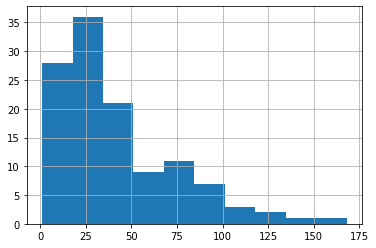

In [20]:
data_cleaned3['Ozone'].hist()

<AxesSubplot:>

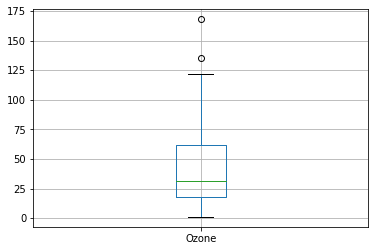

In [21]:
data_cleaned3.boxplot(column=['Ozone'])

In [22]:
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

<AxesSubplot:>

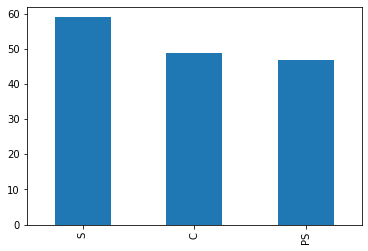

In [23]:
data['Weather'].value_counts().plot.bar()